# Models

#### 1-> Gradient Boosting
#### 2-> Artificial neural network							
#### 3-> Ensemble							
#### 4-> Gaussian process regression							
#### 5-> Random forest							
#### 6-> Support vector regression							
#### 7-> Modified ANN	

##### Actual	  Predicted	     Actual	        Predicted	      Actual	      Predicted
##### Overall	 Overall	      training	     training	         Testing	     Testing

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import xgboost as xgb
import numpy as np

# Load the dataset
data = pd.read_excel('1-s2.0-S2213343723014719-mmc3.xlsx')

# Columns to keep
columns_to_keep = [
    'Symmetry', 'Cell Density [g/cm^3]', 'Cell Volume []', 
    'Pore Diameter [Å]', 'Porosity [-]', 'Pressure [bar]', 
    'Temperature [°C]', 'CO2 Partial Pressure [bar]', 
    'CO2 Adsorption Capacity [mmol/g]'
]

# Filter the dataset
df = data[columns_to_keep]

# Display the filtered dataset
df.head()


,Symmetry,Cell Density [g/cm^3],Cell Volume [],Pore Diameter [Å],Porosity [-],Pressure [bar],Temperature [°C],CO2 Partial Pressure [bar],CO2 Adsorption Capacity [mmol/g]
0,Pm-3m,1.85,3640.89,6.80,0.64,1,25,0.15,0.727365
1,C2/c,1.27,10127.90,4.62,0.55,1,25,0.15,0.672152
2,Pccn,1.44,4703.28,3.88,0.56,1,25,0.15,1.041453
3,Pccn,1.28,3191.38,6.10,0.51,1,25,0.15,0.391099
4,P21/c,2.82,3885.79,6.02,0.55,1,25,0.15,0.275758


In [11]:
df.shape

(3816, 9)

In [12]:
df.head(5)

,Symmetry,Cell Density [g/cm^3],Cell Volume [],Pore Diameter [Å],Porosity [-],Pressure [bar],Temperature [°C],CO2 Partial Pressure [bar],CO2 Adsorption Capacity [mmol/g]
0,Pm-3m,1.85,3640.89,6.80,0.64,1,25,0.15,0.727365
1,C2/c,1.27,10127.90,4.62,0.55,1,25,0.15,0.672152
2,Pccn,1.44,4703.28,3.88,0.56,1,25,0.15,1.041453
3,Pccn,1.28,3191.38,6.10,0.51,1,25,0.15,0.391099
4,P21/c,2.82,3885.79,6.02,0.55,1,25,0.15,0.275758


In [13]:
df.columns

Index(['Symmetry', 'Cell Density [g/cm^3]', 'Cell Volume []',
       'Pore Diameter [Å]', 'Porosity [-]', 'Pressure [bar]',
       'Temperature [°C]', 'CO2 Partial Pressure [bar]',
       'CO2 Adsorption Capacity [mmol/g]'],
      dtype='object')

In [14]:
df.head()

,Symmetry,Cell Density [g/cm^3],Cell Volume [],Pore Diameter [Å],Porosity [-],Pressure [bar],Temperature [°C],CO2 Partial Pressure [bar],CO2 Adsorption Capacity [mmol/g]
0,Pm-3m,1.85,3640.89,6.80,0.64,1,25,0.15,0.727365
1,C2/c,1.27,10127.90,4.62,0.55,1,25,0.15,0.672152
2,Pccn,1.44,4703.28,3.88,0.56,1,25,0.15,1.041453
3,Pccn,1.28,3191.38,6.10,0.51,1,25,0.15,0.391099
4,P21/c,2.82,3885.79,6.02,0.55,1,25,0.15,0.275758


In [20]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Symmetry'] = le.fit_transform(df['Symmetry'])

C:\Users\HP\AppData\Local\Temp\ipykernel_2832\3727160133.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Symmetry'] = le.fit_transform(df['Symmetry'])


In [21]:
X = X[:400]
y = y[:400]

In [22]:
X

,Symmetry,Cell Density [g/cm^3],Cell Volume [],Pore Diameter [Å],Porosity [-],Pressure [bar],Temperature [°C],CO2 Partial Pressure [bar]
0,Pm-3m,1.85,3640.89,6.80,0.64,1,25,0.150000
1,C2/c,1.27,10127.90,4.62,0.55,1,25,0.150000
2,Pccn,1.44,4703.28,3.88,0.56,1,25,0.150000
3,Pccn,1.28,3191.38,6.10,0.51,1,25,0.150000
4,P21/c,2.82,3885.79,6.02,0.55,1,25,0.150000
...,...,...,...,...,...,...,...,...
395,P21,0.92,3888.72,5.66,0.61,1,25,0.150000
396,C2/c,1.31,4933.28,3.84,0.43,1,25,0.150000
397,C2/c,1.38,4860.65,4.24,0.43,1,25,0.150000
398,C2/c,1.47,5003.74,4.15,0.44,1,25,3.061224


In [23]:
X.shape, y.shape

((400, 8), (400,))

In [24]:
X = df.drop(columns='CO2 Adsorption Capacity [mmol/g]', axis = 1)
y = df['CO2 Adsorption Capacity [mmol/g]']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
X_train.shape

(3052, 8)

In [26]:
 X_test.shape

(764, 8)

In [27]:
results = []

In [28]:
def model_metrics(model, X, y, X_train, y_train, X_test, y_test):
    
    # Predictions
    y_pred_tot = model.predict(X)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    # R² score
    r2_tot = r2_score(y, y_pred_tot)
    r2_train = r2_score(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred_test)
    
    # RMSE
    rmse_tot = np.sqrt(mean_squared_error(y, y_pred_tot))
    rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
    
    # Print the results
    print(f'Overall R² Score: {r2_tot}')
    print(f'Train R² Score: {r2_train}')
    print(f'Test R² Score: {r2_test}')
    
    print(f'Overall RMSE: {rmse_tot}')
    print(f'Train RMSE: {rmse_train}')
    print(f'Test RMSE: {rmse_test}')
    
    metrics = {
        'Model': model.__class__.__name__,
        'Overall R² Score': r2_tot,
        'Train R² Score': r2_train,
        'Test R² Score': r2_test,
        'Overall RMSE': rmse_tot,
        'Train RMSE': rmse_train,
        'Test RMSE': rmse_test
    }
    
    return metrics

## Gradient Boosting

In [29]:
from sklearn.ensemble import GradientBoostingRegressor

In [30]:
GBR = GradientBoostingRegressor(random_state=42)
GBR.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

In [31]:
print(f'Gradient Boosting Model Metrics')

results.append(model_metrics(GBR, X, y, X_train, y_train, X_test, y_test))

Gradient Boosting Model Metrics
Overall R² Score: 0.34366491025549983
Train R² Score: 0.36844521254620577
Test R² Score: 0.22238251523314057
Overall RMSE: 0.7190344950317192
Train RMSE: 0.7151197606202988
Test RMSE: 0.7344648001744992


## Artificial neural network

In [32]:
from sklearn.neural_network import MLPRegressor

In [33]:
ann = MLPRegressor(hidden_layer_sizes=200, solver='lbfgs');
ann.fit(X_train, y_train)

C:\Users\HP\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPRegressor(hidden_layer_sizes=200, solver='lbfgs')

In [34]:
print(f'Artificial Neural Network Model Metrics')
results.append(model_metrics(ann, X, y, X_train, y_train, X_test, y_test))

Artificial Neural Network Model Metrics
Overall R² Score: 0.00297574814054824
Train R² Score: 0.0111387002181641
Test R² Score: -0.04379638138355513
Overall RMSE: 0.8862163845920382
Train RMSE: 0.8948308604258115
Test RMSE: 0.8509339899490845


## Gaussian process regression

In [35]:
from sklearn.gaussian_process import GaussianProcessRegressor
gpr = GaussianProcessRegressor()

gpr.fit(X_train, y_train)

GaussianProcessRegressor()

In [36]:
print(f'Gaussian process regression Model Metrics')
results.append(model_metrics(gpr, X, y, X_train, y_train, X_test, y_test))

Gaussian process regression Model Metrics
Overall R² Score: 0.6076686725176369
Train R² Score: 0.9999998851893608
Test R² Score: -1.2251831486324334
Overall RMSE: 0.555921419772779
Train RMSE: 0.00030490484853234134
Test RMSE: 1.2424269386172004


In [37]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# Define the kernel
kernel = C(1.0, (1e-3, 1e3)) * RBF(1.0, (1e-2, 1e2))

# Initialize the model
gpr = GaussianProcessRegressor(kernel=kernel)

# Define the parameter grid for GridSearchCV and RandomizedSearchCV
# param_grid = {
#     'alpha': [1e-10, 1e-5, 1e-2, 1],
#     'n_restarts_optimizer': [0, 1, 5, 10],
#     'kernel__k2__length_scale': [1e-2, 1e-1, 1, 10],
# }

param_grid = {
    'alpha': [1e-2],
    'n_restarts_optimizer': [1, 5],
    'kernel__k2__length_scale': [1e-1, 1],
}

# GridSearchCV
grid_search = GridSearchCV(estimator=gpr, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=gpr, param_distributions=param_grid, n_iter=10, cv=5, n_jobs=-1, random_state=42)
random_search.fit(X_train, y_train)

# Best parameters and score
print("Best parameters from GridSearchCV: ", grid_search.best_params_)
print("Best score from GridSearchCV: ", grid_search.best_score_)

print("Best parameters from RandomizedSearchCV: ", random_search.best_params_)
print("Best score from RandomizedSearchCV: ", random_search.best_score_)


KeyboardInterrupt: 

In [38]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C

# Define the kernel with the best parameters from GridSearchCV/RandomizedSearchCV
best_kernel = C(1.0) * RBF(length_scale=0.1)

# Create GPR models with the best parameters
gpr1 = GaussianProcessRegressor(kernel=best_kernel, alpha=1, n_restarts_optimizer=0)
gpr2 = GaussianProcessRegressor(kernel=best_kernel, alpha=1, n_restarts_optimizer=0)

# Fit the models on the training data
gpr1.fit(X_train, y_train)
gpr2.fit(X_train, y_train)

# Predict using the models
y_pred_gpr1 = gpr1.predict(X_test)
y_pred_gpr2 = gpr2.predict(X_test)


KeyboardInterrupt: 

In [39]:
print(f'Gaussian process regression Model Metrics Grid Search CV')
results.append(model_metrics(gpr1, X, y, X_train, y_train, X_test, y_test))

Gaussian process regression Model Metrics Grid Search CV


AttributeError: 'GaussianProcessRegressor' object has no attribute 'alpha_'

In [40]:
print(f'Gaussian process regression Model Metrics Random Search CV')
results.append(model_metrics(gpr2, X, y, X_train, y_train, X_test, y_test))

Gaussian process regression Model Metrics Random Search CV
Overall R² Score: -1.3211774470984237
Train R² Score: -1.329536898765567
Test R² Score: -1.3024722057669074
Overall RMSE: 1.352200477854355
Train RMSE: 1.3734348401261776
Test RMSE: 1.2638198617166052


C:\Users\HP\anaconda\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but GaussianProcessRegressor was fitted without feature names
  warnings.warn(
C:\Users\HP\anaconda\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but GaussianProcessRegressor was fitted without feature names
  warnings.warn(
C:\Users\HP\anaconda\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but GaussianProcessRegressor was fitted without feature names
  warnings.warn(


## Random forest

In [41]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

RandomForestRegressor()

In [42]:
print(f'Random forest Model Metrics')
results.append(model_metrics(rf, X, y, X_train, y_train, X_test, y_test))

Random forest Model Metrics
Overall R² Score: 0.780508706079119
Train R² Score: 0.8920299252374474
Test R² Score: 0.25857249314639896
Overall RMSE: 0.41581060667920045
Train RMSE: 0.29568205242466034
Test RMSE: 0.7171703484244011


## Support vector regression

In [43]:
from sklearn.svm import SVR
svr = SVR();
svr.fit(X_train, y_train)

SVR()

In [44]:
print(f'Support vector regression Model Metrics')
results.append(model_metrics(svr, X, y, X_train, y_train, X_test, y_test))

Support vector regression Model Metrics
Overall R² Score: -0.007877490881643245
Train R² Score: -0.013043146653986648
Test R² Score: 0.007406353419491696
Overall RMSE: 0.8910268414927556
Train RMSE: 0.9057059785135169
Test RMSE: 0.8298005601124743


## Cross Validation of Models

In [45]:
from sklearn.model_selection import cross_val_score

models = [('SVR', SVR(kernel='rbf')),
    ('Random Forest', RandomForestRegressor(random_state=42)),
    ('Gradient Boosting', GradientBoostingRegressor(random_state=42)),
    ('Gaussian Process Regressor', GaussianProcessRegressor(random_state=42)), 
    ('Artificial Neural Network', MLPRegressor(random_state=42))]

In [46]:
for name, model in models:
    cv_score = cross_val_score(model, X, y, cv = 5, scoring='r2')
    print(f'{name}: Average R² Score: {np.mean(cv_score)}')

SVR: Average R² Score: -0.020631821384199812
Random Forest: Average R² Score: 0.16193744878206268
Gradient Boosting: Average R² Score: 0.17493120781852023
Gaussian Process Regressor: Average R² Score: -1.2314716846748166
Artificial Neural Network: Average R² Score: -5320.150724429233


In [47]:
results_df = pd.DataFrame(results)

In [48]:
results_df

,Model,Overall R² Score,Train R² Score,Test R² Score,Overall RMSE,Train RMSE,Test RMSE
0,GradientBoostingRegressor,0.343665,0.368445,0.222383,0.719034,0.715120,0.734465
1,MLPRegressor,0.002976,0.011139,-0.043796,0.886216,0.894831,0.850934
2,GaussianProcessRegressor,0.607669,1.000000,-1.225183,0.555921,0.000305,1.242427
3,GaussianProcessRegressor,-1.321177,-1.329537,-1.302472,1.352200,1.373435,1.263820
4,RandomForestRegressor,0.780509,0.892030,0.258572,0.415811,0.295682,0.717170
5,SVR,-0.007877,-0.013043,0.007406,0.891027,0.905706,0.829801


## Calculating the values and Error for each model

In [49]:
df.sample(5)

,Symmetry,Cell Density [g/cm^3],Cell Volume [],Pore Diameter [Å],Porosity [-],Pressure [bar],Temperature [°C],CO2 Partial Pressure [bar],CO2 Adsorption Capacity [mmol/g]
3433,72,1.27,2491.63,4.04,0.49,1,25,0.00,0.859139
3381,121,1.23,2942.95,6.43,0.50,1,25,0.00,3.114656
466,96,1.49,6200.97,4.64,0.48,1,25,0.15,2.491359
25,2,1.29,3403.16,5.31,0.54,1,25,0.15,1.139836
2533,3,1.23,2077.59,5.05,0.51,1,25,0.00,0.355437


In [50]:
GBR_pred = GBR.predict(X)

In [51]:
GBR_pred.shape

(3816,)

In [52]:
df['gbr_pred'] = GBR_pred

C:\Users\HP\AppData\Local\Temp\ipykernel_2832\3554282234.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['gbr_pred'] = GBR_pred


In [53]:
df.sample(5)

,Symmetry,Cell Density [g/cm^3],Cell Volume [],Pore Diameter [Å],Porosity [-],Pressure [bar],Temperature [°C],CO2 Partial Pressure [bar],CO2 Adsorption Capacity [mmol/g],gbr_pred
3523,98,1.64,2637.46,4.35,0.53,1,25,0.0,1.260432,1.734909
1863,3,1.10,9528.28,10.83,0.58,1,25,0.0,0.178600,0.689737
1652,96,1.55,2233.04,4.28,0.44,1,25,0.0,1.680835,0.976889
2138,191,1.02,7992.96,4.19,0.51,1,25,0.0,1.836200,1.589106
2361,126,0.81,38905.15,8.02,0.66,1,25,0.0,0.740624,0.616217


In [54]:
df['gbr_error'] = np.abs(df['CO2 Adsorption Capacity [mmol/g]'] - df['gbr_pred'])

C:\Users\HP\AppData\Local\Temp\ipykernel_2832\1782067222.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['gbr_error'] = np.abs(df['CO2 Adsorption Capacity [mmol/g]'] - df['gbr_pred'])


In [55]:
df['ann_pred'] = ann.predict(X)

C:\Users\HP\AppData\Local\Temp\ipykernel_2832\1561136774.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ann_pred'] = ann.predict(X)


In [56]:
df['ann_error'] = np.abs(df['CO2 Adsorption Capacity [mmol/g]'] - df['ann_pred'])

C:\Users\HP\AppData\Local\Temp\ipykernel_2832\1582319904.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ann_error'] = np.abs(df['CO2 Adsorption Capacity [mmol/g]'] - df['ann_pred'])


In [57]:
df.sample(5)

,Symmetry,Cell Density [g/cm^3],Cell Volume [],Pore Diameter [Å],Porosity [-],Pressure [bar],Temperature [°C],CO2 Partial Pressure [bar],CO2 Adsorption Capacity [mmol/g],gbr_pred,gbr_error,ann_pred,ann_error
1560,3,1.04,18704.78,5.70,0.67,1,25,0.00,0.693289,0.777266,0.083977,0.750574,0.057285
1229,96,1.16,2598.33,4.55,0.47,1,25,0.00,1.263610,1.171486,0.092124,1.225670,0.037940
721,72,0.92,4679.06,4.41,0.57,1,25,0.00,1.488031,1.375368,0.112664,1.378498,0.109534
1734,26,0.95,18337.09,6.69,0.72,1,25,0.00,0.704933,0.529856,0.175077,1.013183,0.308250
275,201,1.26,12341.67,5.56,0.48,1,25,0.15,0.377909,0.535594,0.157686,0.769461,0.391552


In [58]:
df['svr_pred'] = svr.predict(X);
df['svr_error'] = np.abs(df['CO2 Adsorption Capacity [mmol/g]'] - df['svr_pred'])

C:\Users\HP\AppData\Local\Temp\ipykernel_2832\3123267712.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['svr_pred'] = svr.predict(X);
C:\Users\HP\AppData\Local\Temp\ipykernel_2832\3123267712.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['svr_error'] = np.abs(df['CO2 Adsorption Capacity [mmol/g]'] - df['svr_pred'])


In [59]:
df.sample(5)

,Symmetry,Cell Density [g/cm^3],Cell Volume [],Pore Diameter [Å],Porosity [-],Pressure [bar],Temperature [°C],CO2 Partial Pressure [bar],CO2 Adsorption Capacity [mmol/g],gbr_pred,gbr_error,ann_pred,ann_error,svr_pred,svr_error
1373,183,1.61,4721.23,6.26,0.66,1,25,0.00,0.023893,0.894797,0.870905,0.717187,0.693295,0.901210,0.877317
2520,91,1.06,1750.78,4.51,0.58,1,25,0.00,0.949673,1.246272,0.296598,1.227681,0.278008,0.979361,0.029688
437,32,0.91,8528.43,5.54,0.70,1,25,0.15,0.577867,0.778115,0.200248,1.431324,0.853457,0.777269,0.199402
1990,96,1.40,2377.22,4.31,0.50,1,25,0.00,0.485233,1.518208,1.032975,1.229468,0.744236,0.966579,0.481346
2146,152,0.75,3096.77,7.89,0.72,1,25,0.00,0.691428,0.631197,0.060230,0.789239,0.097811,0.946705,0.255277


In [60]:
df['gpr_pred'] = gpr.predict(X)
df['gpr_error'] = np.abs(df['CO2 Adsorption Capacity [mmol/g]'] - df['gpr_pred'])

C:\Users\HP\anaconda\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but GaussianProcessRegressor was fitted without feature names
  warnings.warn(
C:\Users\HP\AppData\Local\Temp\ipykernel_2832\2092414531.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['gpr_pred'] = gpr.predict(X)


In [61]:
df.sample(5)

,Symmetry,Cell Density [g/cm^3],Cell Volume [],Pore Diameter [Å],Porosity [-],Pressure [bar],Temperature [°C],CO2 Partial Pressure [bar],CO2 Adsorption Capacity [mmol/g],gbr_pred,gbr_error,ann_pred,ann_error,svr_pred,svr_error,gpr_pred,gpr_error
3088,70,0.46,14867.94,10.14,0.81,1,25,0.0,0.300426,0.240563,0.059863,1.007107,0.706681,0.538094,0.237668,0.0,0.300426
1929,89,1.52,857.11,3.88,0.41,1,25,0.0,0.641380,1.060346,0.418966,1.241234,0.599853,0.994815,0.353435,0.0,0.641380
2687,3,1.51,4921.13,4.41,0.57,1,25,0.0,1.979717,1.601367,0.378350,1.057720,0.921997,0.907550,1.072167,0.0,1.979717
3294,19,1.83,13882.68,4.39,0.45,1,25,0.0,0.573692,0.573315,0.000377,1.120768,0.547077,0.571288,0.002403,0.0,0.573692
948,194,1.62,1827.27,4.62,0.40,1,25,0.0,0.216739,0.659293,0.442555,1.485376,1.268637,0.971177,0.754439,0.0,0.216739


In [62]:
df['rf_pred'] = rf.predict(X)
df['rf_error'] = np.abs(df['CO2 Adsorption Capacity [mmol/g]'] - df['rf_pred'])

In [63]:
df.sample(5)

,Symmetry,Cell Density [g/cm^3],Cell Volume [],Pore Diameter [Å],Porosity [-],Pressure [bar],Temperature [°C],CO2 Partial Pressure [bar],CO2 Adsorption Capacity [mmol/g],gbr_pred,gbr_error,ann_pred,ann_error,svr_pred,svr_error,gpr_pred,gpr_error,rf_pred,rf_error
1397,83,1.05,4722.55,9.83,0.58,1,25,0.00,0.305672,0.586736,0.281064,1.140525,0.834853,0.907987,0.602315,0.0,0.305672,0.308051,0.002379
3307,3,1.23,7825.67,3.90,0.53,1,25,0.00,0.923119,1.641615,0.718496,0.957988,0.034869,0.806699,0.116420,0.0,0.923119,1.331982,0.408863
1284,3,0.86,12002.22,7.32,0.67,1,25,0.00,0.249394,0.734903,0.485509,0.698442,0.449048,0.639864,0.390470,0.0,0.249394,0.783164,0.533770
1103,100,1.65,1453.15,3.87,0.48,1,25,0.00,1.288315,1.358893,0.070579,1.070542,0.217773,0.984203,0.304112,0.0,1.288315,1.304712,0.016397
150,156,1.54,8424.42,4.35,0.52,1,25,0.15,2.541038,1.512231,1.028806,0.989797,1.551241,0.773037,1.768000,0.0,2.541038,2.320591,0.220447


In [64]:
df.to_csv('models and its error.csv')

In [65]:
new_df = df

In [66]:
new_df.columns

Index(['Symmetry', 'Cell Density [g/cm^3]', 'Cell Volume []',
       'Pore Diameter [Å]', 'Porosity [-]', 'Pressure [bar]',
       'Temperature [°C]', 'CO2 Partial Pressure [bar]',
       'CO2 Adsorption Capacity [mmol/g]', 'gbr_pred', 'gbr_error', 'ann_pred',
       'ann_error', 'svr_pred', 'svr_error', 'gpr_pred', 'gpr_error',
       'rf_pred', 'rf_error'],
      dtype='object')

In [67]:
new_df.drop(columns=['Symmetry', 'Cell Density [g/cm^3]', 'Cell Volume []',
       'Pore Diameter [Å]', 'Porosity [-]', 'Pressure [bar]',
       'Temperature [°C]', 'CO2 Partial Pressure [bar]',
       'CO2 Adsorption Capacity [mmol/g]'], inplace= True)

In [68]:
new_df

,gbr_pred,gbr_error,ann_pred,ann_error,svr_pred,svr_error,gpr_pred,gpr_error,rf_pred,rf_error
0,0.906772,0.179407,0.700483,0.026882,0.931416,0.204052,0.0,0.727365,1.181651,0.454287
1,1.328207,0.656055,0.874642,0.202490,0.714681,0.042529,0.0,0.672152,0.791248,0.119096
2,1.820299,0.778846,0.839716,0.201737,0.902309,0.139144,0.0,1.041453,1.238817,0.197364
3,0.921065,0.529966,0.746386,0.355287,0.942906,0.551808,0.0,0.391099,0.540631,0.149532
4,0.731105,0.455347,1.197590,0.921832,0.930640,0.654882,0.0,0.275758,0.562162,0.286404
...,...,...,...,...,...,...,...,...,...,...
3811,1.178688,0.845240,1.287652,0.736276,0.638187,1.385741,0.0,2.023928,1.751840,0.272088
3812,0.975181,1.793523,1.331772,1.436932,0.974512,1.794192,0.0,2.768704,2.238166,0.530538
3813,0.904604,0.790333,1.211712,1.097442,0.806053,0.691782,0.0,0.114271,1.686125,1.571854
3814,0.554802,0.138173,1.226341,0.809712,0.998508,0.581879,0.0,0.416629,0.432476,0.015848


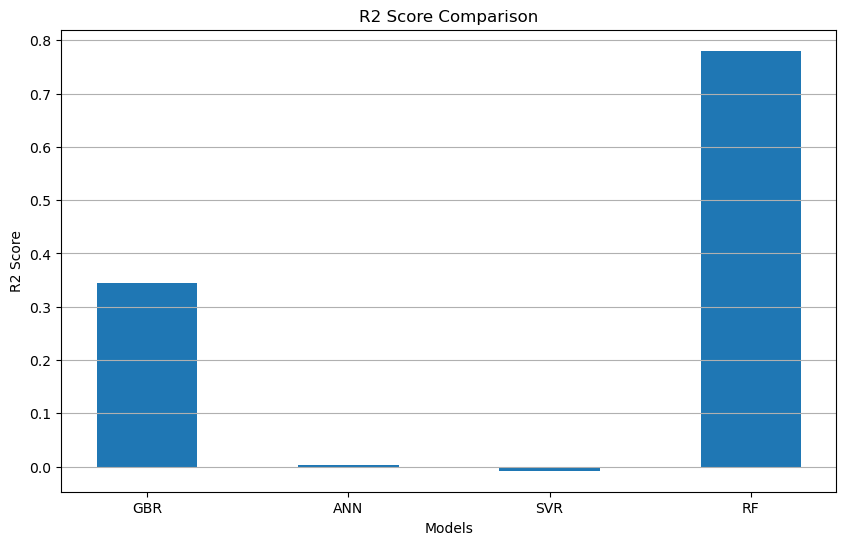

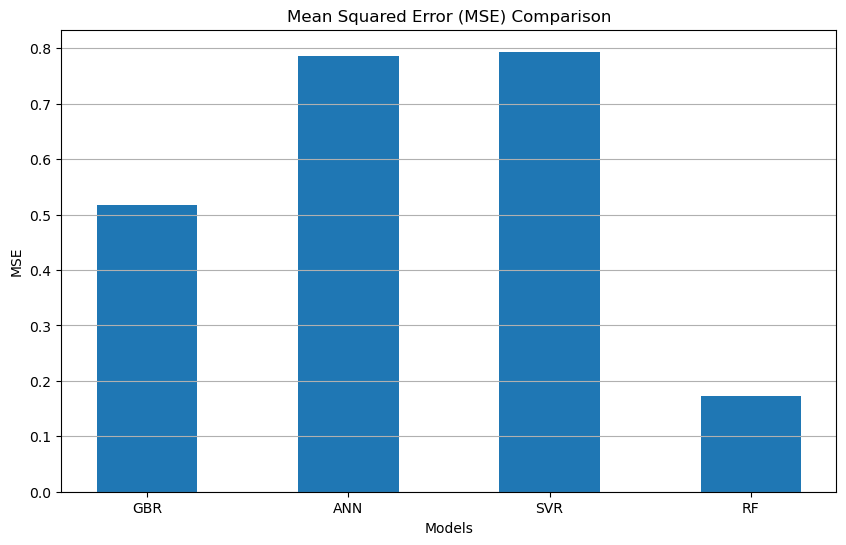

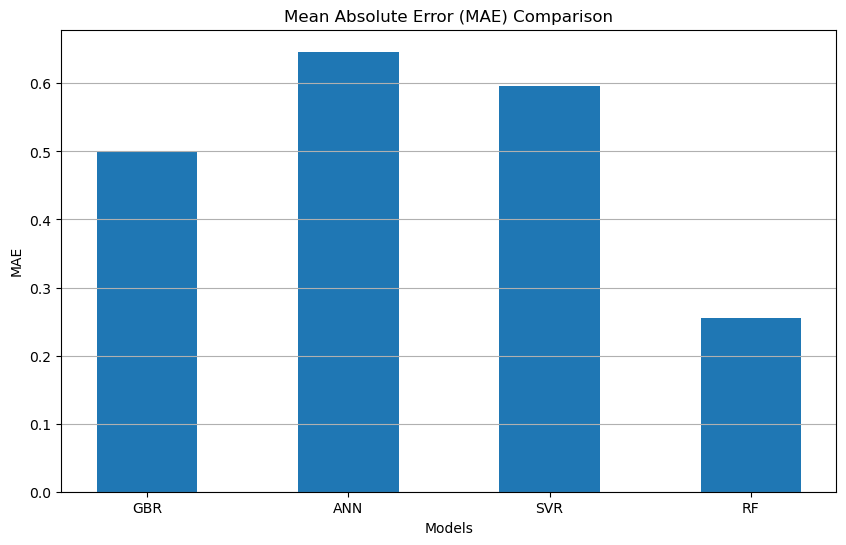

In [69]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Assuming `actual_values` contains the true values and each model has a column in `new_df` for predictions
# Example: replace `actual_values` with your true target variable
actual_values = y

# Extract model predictions
model_predictions = {
    'GBR': new_df['gbr_pred'],
    'ANN': new_df['ann_pred'],
    'SVR': new_df['svr_pred'],
#     'GPR': new_df['gpr_pred'],
    'RF': new_df['rf_pred']
}

# Calculate metrics for each model
model_metrics = {
    'Model': [],
    'R2_Score': [],
    'MSE': [],
    'MAE': []
}

for model_name, predictions in model_predictions.items():
    model_metrics['Model'].append(model_name)
    model_metrics['R2_Score'].append(r2_score(actual_values, predictions))
    model_metrics['MSE'].append(mean_squared_error(actual_values, predictions))
    model_metrics['MAE'].append(mean_absolute_error(actual_values, predictions))

# Convert to DataFrame
metrics_df = pd.DataFrame(model_metrics)

# Plot R2 Scores
plt.figure(figsize=(10, 6))
plt.bar(metrics_df['Model'], metrics_df['R2_Score'], width=0.5)
plt.title('R2 Score Comparison')
plt.xlabel('Models')
plt.ylabel('R2 Score')
plt.grid(axis='y')
plt.show()

# Plot MSE
plt.figure(figsize=(10, 6))
plt.bar(metrics_df['Model'], metrics_df['MSE'], width=0.5)
plt.title('Mean Squared Error (MSE) Comparison')
plt.xlabel('Models')
plt.ylabel('MSE')
plt.grid(axis='y')
plt.show()

# Plot MAE
plt.figure(figsize=(10, 6))
plt.bar(metrics_df['Model'], metrics_df['MAE'], width=0.5)
plt.title('Mean Absolute Error (MAE) Comparison')
plt.xlabel('Models')
plt.ylabel('MAE')
plt.grid(axis='y')
plt.show()


In [70]:
X

,Symmetry,Cell Density [g/cm^3],Cell Volume [],Pore Diameter [Å],Porosity [-],Pressure [bar],Temperature [°C],CO2 Partial Pressure [bar]
0,179,1.85,3640.89,6.80,0.64,1,25,0.15
1,3,1.27,10127.90,4.62,0.55,1,25,0.15
2,175,1.44,4703.28,3.88,0.56,1,25,0.15
3,175,1.28,3191.38,6.10,0.51,1,25,0.15
4,96,2.82,3885.79,6.02,0.55,1,25,0.15
...,...,...,...,...,...,...,...,...
3811,96,0.88,11897.42,4.92,0.60,1,25,0.00
3812,72,1.61,2066.17,5.08,0.49,1,25,0.00
3813,102,1.21,7666.67,5.63,0.70,1,25,0.00
3814,72,1.16,684.99,5.12,0.72,1,25,0.00


In [72]:
y_train

644     0.093683
1334    2.836912
2676    0.168444
3652    0.288628
1491    0.148581
          ...   
1130    1.054137
1294    0.162289
860     0.957226
3507    0.432501
3174    1.225021
Name: CO2 Adsorption Capacity [mmol/g], Length: 3052, dtype: float64

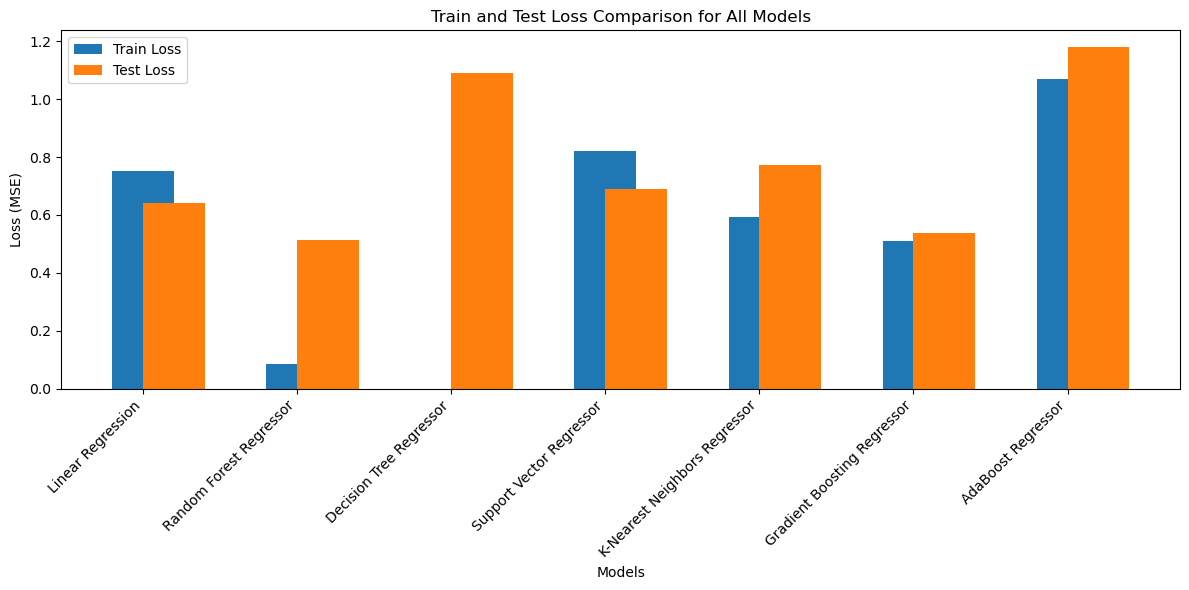

In [75]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# Assuming X_train, X_test, y_train, y_test are available
# Replace with your actual datasets

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor
from sklearn.neural_network import MLPRegressor

# Initialize models
linear_reg = LinearRegression()
rf_reg = RandomForestRegressor()
dt_reg = DecisionTreeRegressor()
svr_reg = SVR()
knn_reg = KNeighborsRegressor()
gbr_reg = GradientBoostingRegressor()
ada_reg = AdaBoostRegressor()
# mlp_reg = MLPRegressor()

# Train models (assuming X_train and y_train are defined)
linear_reg.fit(X_train, y_train)
rf_reg.fit(X_train, y_train)
dt_reg.fit(X_train, y_train)
svr_reg.fit(X_train, y_train)
knn_reg.fit(X_train, y_train)
gbr_reg.fit(X_train, y_train)
ada_reg.fit(X_train, y_train)
# mlp_reg.fit(X_train, y_train)

# Now add them to the models dictionary
models = {
    "Linear Regression": linear_reg,
    "Random Forest Regressor": rf_reg,
    "Decision Tree Regressor": dt_reg,
    "Support Vector Regressor": svr_reg,
    "K-Nearest Neighbors Regressor": knn_reg,
    "Gradient Boosting Regressor": gbr_reg,
    "AdaBoost Regressor": ada_reg,
#     "MLP Regressor": mlp_reg
}

# Compute train and test losses
train_losses = []
test_losses = []
model_names = []

for model_name, model in models.items():
    model_names.append(model_name)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Use MSE for loss calculation
    train_loss = mean_squared_error(y_train, y_train_pred)
    test_loss = mean_squared_error(y_test, y_test_pred)
    
    train_losses.append(train_loss)
    test_losses.append(test_loss)

# Plot train and test losses
x = range(len(models))

plt.figure(figsize=(12, 6))
plt.bar(x, train_losses, width=0.4, label='Train Loss', align='center')
plt.bar(x, test_losses, width=0.4, label='Test Loss', align='edge')
plt.xticks(x, model_names, rotation=45, ha='right')
plt.xlabel("Models")
plt.ylabel("Loss (MSE)")
plt.title("Train and Test Loss Comparison for All Models")
plt.legend()
plt.tight_layout()
plt.show()


Best Model:
Model       Random Forest Regressor
R2_Score                    0.25715
MSE                         0.51532
Name: 0, dtype: object

Second Best Model:
Model       Gradient Boosting Regressor
R2_Score                       0.222743
MSE                            0.539189
Name: 1, dtype: object


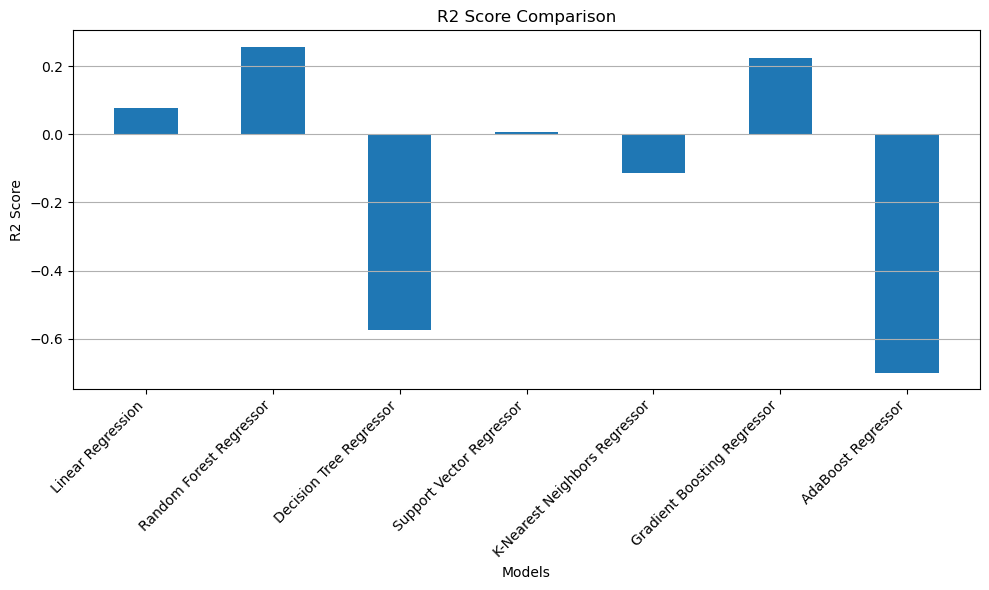

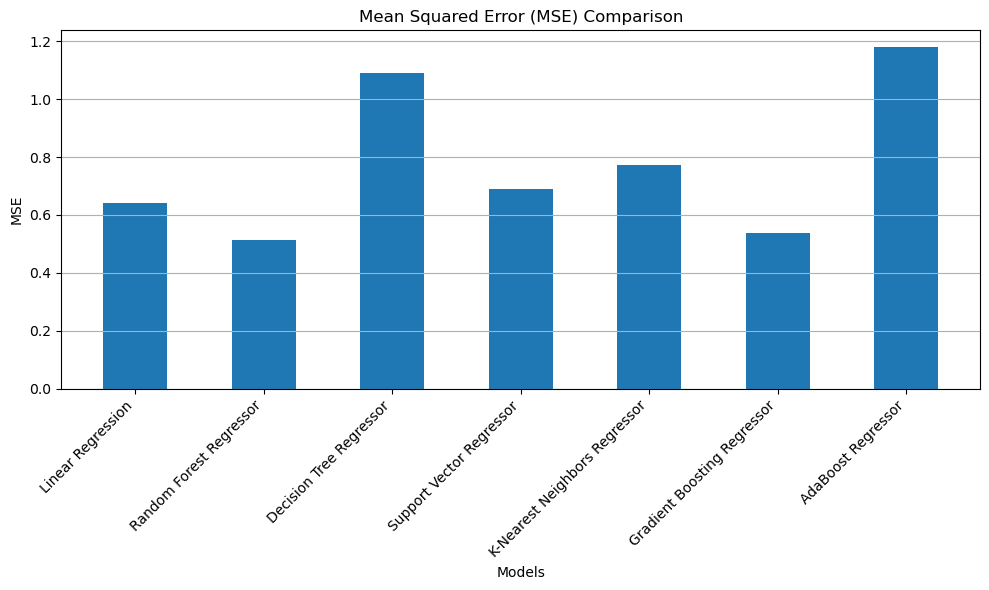

In [76]:
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error
import pandas as pd

# Assuming X_test and y_test are defined and models are trained
# Calculate R2 Score and MSE for each model
r2_scores = []
mse_scores = []
model_names = []

for model_name, model in models.items():
    model_names.append(model_name)
    y_test_pred = model.predict(X_test)
    
    r2 = r2_score(y_test, y_test_pred)
    mse = mean_squared_error(y_test, y_test_pred)
    
    r2_scores.append(r2)
    mse_scores.append(mse)

# Create a DataFrame to store the metrics
metrics_df = pd.DataFrame({
    'Model': model_names,
    'R2_Score': r2_scores,
    'MSE': mse_scores
})

# Sort the DataFrame by R2_Score to find the best and second-best models
best_models = metrics_df.sort_values(by='R2_Score', ascending=False).reset_index(drop=True)
best_model = best_models.iloc[0]
second_best_model = best_models.iloc[1]

print("Best Model:")
print(best_model)
print("\nSecond Best Model:")
print(second_best_model)

# Plot R2 Scores
plt.figure(figsize=(10, 6))
plt.bar(metrics_df['Model'], metrics_df['R2_Score'], width=0.5)
plt.title('R2 Score Comparison')
plt.xlabel('Models')
plt.ylabel('R2 Score')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Plot MSE
plt.figure(figsize=(10, 6))
plt.bar(metrics_df['Model'], metrics_df['MSE'], width=0.5)
plt.title('Mean Squared Error (MSE) Comparison')
plt.xlabel('Models')
plt.ylabel('MSE')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()
